In [ ]:
import numpy as np;
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Simple SIR Model

In [ ]:
N0=0.152*10000

A=0  #birthrate
beta=0.1*(10**-5)  #transmission rate
mu=0  #4.215*(10**-5)  #death rate
gamma=0.024 #recovery rate
s0=N0*.824;  #intial susceptible pop
i0=N0*0.118;  #inital infected pop
r0=N0*0.058; #initial recovered pop


t=np.linspace(0,200,10000)   #time interval, third arg is how many steps


In [ ]:
def SIR_1(y,t):
  S,I,R=y; 
  dydt=[A-beta*S*I-mu*S,beta*S*I-gamma*I-mu*I, gamma*I-mu*R]
  return dydt



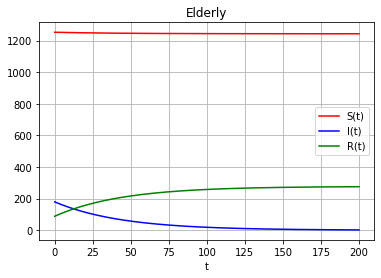

In [ ]:
y0=[s0,i0,r0];
sol=odeint(SIR_1,y0,t)
plt.plot(t,sol[:,0],'r',label='S(t)')
plt.plot(t,sol[:,1],'b',label='I(t)')
plt.plot(t,sol[:,2],'g',label='R(t)')
plt.legend(loc='best');
plt.xlabel('t');
plt.title('Elderly')
plt.grid();
plt.show();

SVEIR Model:
Must enter exposed population before entering Infected population

In [ ]:
N=10000*0.17 #population
r=0  #rate of birth
K=10000 #pop limit
beta=0.05*(10**-5)  #transmission rate from susceptible to exposed
mu=0  #death rate from susceptible pop
tau=0.024 #recovery rate from infected
zeta1=.02  #vax 1 rate
zeta2=.02  #vax 2 rate, after getting vax 2 automatically moved to recovered
omega=.1*(10**-6) #rate from vax1 to susceptible
epsilon=0.1 #rate from vax1 to infected
sigma=0.6  #rate from exposed to infected
alpha=0  #death rate from infected pop

s0=0.7*N;  #intial susceptible pop
i0=0.1*N;  #inital infected pop
r0=0.05*N; #initial recovered pop
v0=0.05*N;
e0=0.1*N;

t=np.linspace(0,200,1000)


In [ ]:
def SVEIR(y,t):
  S,V,E,I,R=y; 
  dS=(r*N*(1-(N/K)))-(beta*S*I/N)-(S*(zeta1+mu))+(omega*V);
  dV=(zeta1*S)-((1-epsilon)*beta*V*I/N)-((zeta2+mu+omega)*V);
  dE=(beta*S*I/N)+((1-epsilon)*beta*V*I/N)-((sigma+mu)*E);
  dI=(sigma*E)-((mu+alpha+tau)*I);
  dR=(tau*I)+(zeta2*V)-(mu*R)
  dydt=[dS, dV, dE, dI, dR];
  return dydt

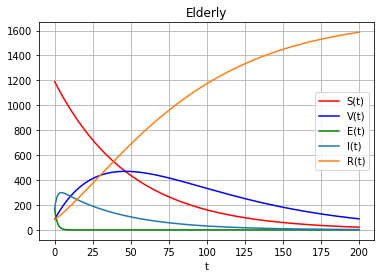

In [ ]:
y0=[s0,v0,e0,i0,r0];
sol=odeint(SVEIR,y0,t)
plt.plot(t,sol[:,0],'r',label='S(t)')
plt.plot(t,sol[:,1],'b',label='V(t)')
plt.plot(t,sol[:,2],'g',label='E(t)')
plt.plot(t,sol[:,3],label='I(t)')
plt.plot(t,sol[:,4],label='R(t)')
plt.legend(loc='best');
plt.title('Elderly')
plt.xlabel('t');
plt.grid();
plt.show();

Simple SIR Model for three populations (geographic pops)

Assumes S and R from one population travel to another population at same rate, infected travel at different rates

In [ ]:
A=0.4  #birthrate, same for all pops
mu=4.215*(10**-5)  #death rate, same for all pops

beta1=0.1*(10**-2)  #transmission rate from S_1 to I_1
gamma1=0.048 #recovery rate in pop1, I_1 to R_1
tau_12=0.0003 #travel rate between R_1, S_1 to R_2, S_2
iota_12=0.0005  #travel rate between I_1 to I_2
tau_13=0.0002 #travel rate between R_1, S_1 to R_3, S_3
iota_13=0.0001  #travel rate between I_1 to I_3
s1_0=750;  #intial susceptible pop1
i1_0=175;  #inital infected pop1
r1_0=75; #initial recovered pop1

beta2=0.1*(10**-2)  #transmission rate from S_2 to I_2
gamma2=0.048 #recovery rate in pop2, I_2 to R_2
tau_23=0.0003 #travel rate between R_2, S_2 to R_3, S_3
iota_23=0.0005  #travel rate between I_2 to I_3
tau_21=0.0002 #travel rate between R_2, S_2 to R_1, S_1
iota_21=0.0001  #travel rate between I_2 to I_1
s2_0=750;  #intial susceptible pop2
i2_0=175;  #inital infected pop2
r2_0=75; #initial recovered pop2

beta3=0.1*(10**-2)  #transmission rate from S_3 to I_3
gamma3=0.048 #recovery rate in pop3, I_3 to R_3
tau_32=0.0003 #travel rate between R_3, S_3 to R_2, S_2
iota_32=0.0005  #travel rate between I_3 to I_2
tau_31=0.0002 #travel rate between R_3, S_3 to R_1, S_1
iota_31=0.0001  #travel rate between I_3 to I_1
s3_0=750;  #intial susceptible pop3
i3_0=175;  #inital infected pop3
r3_0=75; #initial recovered pop3

##right now all parameters are equal, so should reflect standard SIR model
t=np.linspace(0,100,1000)

In [ ]:
def SIR_3(y,t):
  S_1,I_1,R_1,S_2,I_2,R_2,S_3,I_3,R_3=y; 
  dS_1=A-beta1*S_1*I_1-mu*S_1-((tau_12+tau_13)*S_1)+S_2*tau_21+S_3*tau_31;
  dS_2=A-beta2*S_2*I_2-mu*S_2-((tau_21+tau_23)*S_2)+S_1*tau_12+S_3*tau_32;
  dS_3=A-beta3*S_3*I_3-mu*S_3-((tau_31+tau_32)*S_3)+S_2*tau_23+S_1*tau_13;

  dI_1=beta1*S_1*I_1-gamma1*I_1-mu*I_1-((iota_12+iota_13)*I_1)+iota_21*I_2+iota_31*I_3;
  dI_2=beta2*S_2*I_2-gamma2*I_2-mu*I_2-((iota_21+iota_23)*I_2)+iota_12*I_1+iota_32*I_3;
  dI_3=beta3*S_3*I_3-gamma3*I_3-mu*I_3-((iota_32+iota_31)*I_3)+iota_23*I_2+iota_13*I_1;

  dR_1=gamma1*I_1-mu*R_1-((tau_12+tau_13)*R_1)+R_2*tau_21+R_3*tau_31
  dR_2=gamma2*I_2-mu*R_2-((tau_21+tau_23)*R_2)+R_1*tau_12+R_3*tau_32;
  dR_3=gamma3*I_3-mu*R_3-((tau_31+tau_32)*R_3)+R_2*tau_23+R_1*tau_13;
  dydt=[dS_1,dI_1,dR_1,dS_2,dI_2,dR_2,dS_3,dI_3,dR_3]
  return dydt

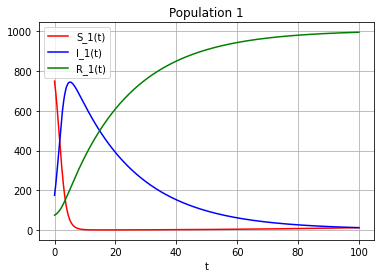

In [ ]:
y0=[s1_0,i1_0,r1_0,s2_0,i2_0,r2_0,s3_0,i3_0,r3_0];
sol=odeint(SIR_3,y0,t)
plt.plot(t,sol[:,0],'r',label='S_1(t)')
plt.plot(t,sol[:,1],'b',label='I_1(t)')
plt.plot(t,sol[:,2],'g',label='R_1(t)')
plt.legend(loc='best');
plt.xlabel('t');
plt.title('Population 1')
plt.grid();
plt.show();

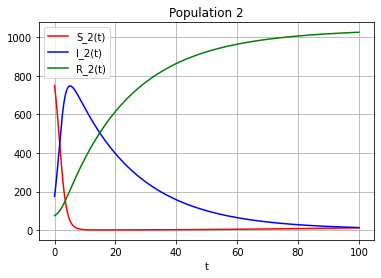

In [ ]:
y0=[s1_0,i1_0,r1_0,s2_0,i2_0,r2_0,s3_0,i3_0,r3_0];
sol=odeint(SIR_3,y0,t)
plt.plot(t,sol[:,3],'r',label='S_2(t)')
plt.plot(t,sol[:,4],'b',label='I_2(t)')
plt.plot(t,sol[:,5],'g',label='R_2(t)')
plt.legend(loc='best');
plt.xlabel('t');
plt.title('Population 2')
plt.grid();
plt.show();

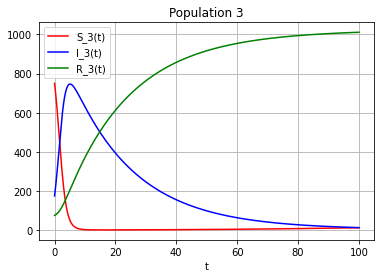

In [ ]:
y0=[s1_0,i1_0,r1_0,s2_0,i2_0,r2_0,s3_0,i3_0,r3_0];
sol=odeint(SIR_3,y0,t)
plt.plot(t,sol[:,6],'r',label='S_3(t)')
plt.plot(t,sol[:,7],'b',label='I_3(t)')
plt.plot(t,sol[:,8],'g',label='R_3(t)')
plt.legend(loc='best');
plt.xlabel('t');
plt.title('Population 3')
plt.grid();
plt.show();

ESIRV for three age groups

In [ ]:
N0=10000  #population
N=1;
r=0  #rate of birth .01
K=10000 #pop limit
beta=0.1*(10**-2)  #transmission rate from susceptible to exposed
mu=0  #death rate from susceptible pop 4.215*(10**-5)
tau=0.048 #recovery rate from infected
zeta1=.02  #vax 1 rate
zeta2=.02  #vax 2 rate, after getting vax 2 automatically moved to recovered
omega=.1*(10**-3) #rate from vax1 to susceptible
epsilon=0.1 #rate from vax1 to infected
alpha=0  #death rate from infected pop 4.215*(10**-4)

beta_11=1*(10**-4)
beta_12=0.5*(10**-6)
beta_13=5*(10**-5)
beta_23=0.01*(10**-5)
beta_22=0.25*(10**-4)
beta_33=0.05*(10**-4)

sigma_1=0.1;
sigma_2=0.3;
sigma_3=0.6;

tau_1=0.024;
tau_2=0.048;
tau_3=0.024;

N1=0.17*N0;
N2=0.678*N0;
N3=0.152*N0;

s0_1=0.7*N1;  #intial susceptible pop
i0_1=0.1*N1;  #inital infected pop
r0_1=0.05*N1; #initial recovered pop
v0_1=0.05*N1;
e0_1=0.1*N1;

s0_2=0.7*N2;  #intial susceptible pop
i0_2=0.1*N2;  #inital infected pop
r0_2=0.05*N2; #initial recovered pop
v0_2=0.05*N2;
e0_2=0.1*N2;

s0_3=0.7*N3;  #intial susceptible pop
i0_3=0.1*N3;  #inital infected pop
r0_3=0.05*N3; #initial recovered pop
v0_3=0.05*N3;
e0_3=0.1*N3;


t=np.linspace(0,200,10000)

In [ ]:
def SVEIR_3(y,t):
  S_1,V_1,E_1,I_1,R_1,S_2,V_2,E_2,I_2,R_2,S_3,V_3,E_3,I_3,R_3=y; 
  dS_1=(r*N*(1-(N/K)))-(beta_11*S_1*I_1/N)-(S_1*(zeta1+mu))+(omega*V_1)-(beta_12*S_1*I_2/N)-(beta_13*S_1*I_3/N);
  dV_1=(zeta1*S_1)-((1-epsilon)*beta_11*V_1*I_1/N)-((zeta2+mu+omega)*V_1)-((1-epsilon)*beta_12*V_1*I_2/N)-((1-epsilon)*beta_13*V_1*I_3/N);
  dE_1=(beta_11*S_1*I_1/N)+((1-epsilon)*beta_11*V_1*I_1/N)-((sigma_1+mu)*E_1)+(beta_12*S_1*I_2/N)+(beta_13*S_1*I_3/N)+((1-epsilon)*beta_12*V_1*I_2/N)+((1-epsilon)*beta_13*V_1*I_3/N);
  dI_1=(sigma_1*E_1)-((mu+alpha+tau_1)*I_1);
  dR_1=(tau_1*I_1)+(zeta2*V_1)-(mu*R_1)

  dS_2=(r*N*(1-(N/K)))-(beta_22*S_2*I_2/N)-(S_2*(zeta1+mu))+(omega*V_2)-(beta_12*S_2*I_1/N)-(beta_23*S_2*I_3/N);
  dV_2=(zeta1*S_2)-((1-epsilon)*beta_22*V_2*I_2/N)-((zeta2+mu+omega)*V_2)-((1-epsilon)*beta_12*V_2*I_1/N)-((1-epsilon)*beta_23*V_2*I_3/N);
  dE_2=(beta_22*S_2*I_2/N)+((1-epsilon)*beta_22*V_2*I_2/N)-((sigma_2+mu)*E_2)+(beta_12*S_2*I_1/N)+(beta_23*S_2*I_3/N)+((1-epsilon)*beta_12*V_2*I_1/N)+((1-epsilon)*beta_23*V_2*I_3/N);
  dI_2=(sigma_2*E_2)-((mu+alpha+tau_2)*I_2);
  dR_2=(tau_2*I_2)+(zeta2*V_2)-(mu*R_2)
  
  dS_3=(r*N*(1-(N/K)))-(beta_33*S_3*I_3/N)-(S_3*(zeta1+mu))+(omega*V_3)-(beta_13*S_3*I_1/N)-(beta_23*S_3*I_2/N);
  dV_3=(zeta1*S_3)-((1-epsilon)*beta_33*V_3*I_3/N)-((zeta2+mu+omega)*V_3)-((1-epsilon)*beta_23*V_3*I_2/N)-((1-epsilon)*beta_13*V_3*I_1/N);
  dE_3=(beta_33*S_3*I_3/N)+((1-epsilon)*beta_33*V_3*I_3/N)-((sigma_3+mu)*E_3)+(beta_23*S_3*I_2/N)+(beta_13*S_3*I_1/N)+((1-epsilon)*beta_23*V_3*I_2/N)+((1-epsilon)*beta_13*V_3*I_1/N);
  dI_3=(sigma_3*E_3)-((mu+alpha+tau_3)*I_3);
  dR_3=(tau_3*I_3)+(zeta2*V_3)-(mu*R_3)
  dydt=[dS_1, dV_1, dE_1, dI_1, dR_1,dS_2, dV_2, dE_2, dI_2, dR_2,dS_3, dV_3, dE_3, dI_3, dR_3];
  return dydt

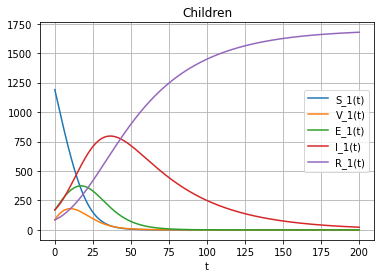

796.4543670341766


In [ ]:
y0=[s0_1,v0_1,e0_1,i0_1,r0_1,s0_2,v0_2,e0_2,i0_2,r0_2,s0_3,v0_3,e0_3,i0_3,r0_3];
sol=odeint(SVEIR_3,y0,t)
plt.plot(t,sol[:,0],label='S_1(t)')
plt.plot(t,sol[:,1],label='V_1(t)')
plt.plot(t,sol[:,2],label='E_1(t)')
plt.plot(t,sol[:,3],label='I_1(t)')
plt.plot(t,sol[:,4],label='R_1(t)')
plt.legend(loc='best');
plt.xlabel('t');
plt.title('Children')
plt.grid();
plt.show();
print(max(sol[:,3]))

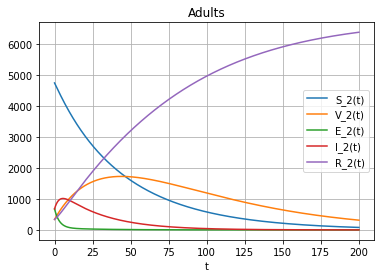

1015.331376192208


In [ ]:
y0=[s0_1,v0_1,e0_1,i0_1,r0_1,s0_2,v0_2,e0_2,i0_2,r0_2,s0_3,v0_3,e0_3,i0_3,r0_3];
sol=odeint(SVEIR_3,y0,t)
plt.plot(t,sol[:,5],label='S_2(t)')
plt.plot(t,sol[:,6],label='V_2(t)')
plt.plot(t,sol[:,7],label='E_2(t)')
plt.plot(t,sol[:,8],label='I_2(t)')
plt.plot(t,sol[:,9],label='R_2(t)')
plt.legend(loc='best');
plt.xlabel('t');
plt.title('Adults')
plt.grid();
plt.show();
print(max(sol[:,8]))

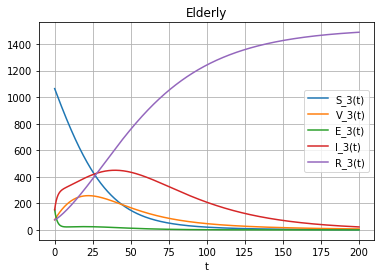

In [ ]:
y0=[s0_1,v0_1,e0_1,i0_1,r0_1,s0_2,v0_2,e0_2,i0_2,r0_2,s0_3,v0_3,e0_3,i0_3,r0_3];
sol=odeint(SVEIR_3,y0,t)
plt.plot(t,sol[:,10],label='S_3(t)')
plt.plot(t,sol[:,11],label='V_3(t)')
plt.plot(t,sol[:,12],label='E_3(t)')
plt.plot(t,sol[:,13],label='I_3(t)')
plt.plot(t,sol[:,14],label='R_3(t)')
plt.legend(loc='best');
plt.xlabel('t');
plt.title('Elderly')
plt.grid();
plt.show();